In [43]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

# Load data & read data using pandas

In [44]:
#import avacado data files
df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/avocado.csv")

In [45]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [46]:
df.rename(columns={'Total Volume':'TotalVolume','4046':'PU_4046','4225':'PU_4225','4770':'PU_4770','Total Bags':'TotalBags','Small Bags':'SmallBags','Large Bags':'LargeBags','XLarge Bags':'XLargeBags'}, inplace=True)
print(df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'TotalVolume', 'PU_4046',
       'PU_4225', 'PU_4770', 'TotalBags', 'SmallBags', 'LargeBags',
       'XLargeBags', 'type', 'year', 'region'],
      dtype='object')


In [47]:
df.head(1)

,Unnamed: 0,Date,AveragePrice,TotalVolume,PU_4046,PU_4225,PU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


In [50]:
# Checking for null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  int64  
 3   TotalVolume   18249 non-null  float64
 4   PU_4046       18249 non-null  float64
 5   PU_4225       18249 non-null  float64
 6   PU_4770       18249 non-null  float64
 7   TotalBags     18249 non-null  float64
 8   SmallBags     18249 non-null  float64
 9   LargeBags     18249 non-null  float64
 10  XLargeBags    18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(8), int64(3), object(3)
memory usage: 1.9+ MB


# Convert all float datatypes into interger using LabelEncoder

In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['AveragePrice'] = le.fit_transform(df.AveragePrice.values)
df['AveragePrice'] = df['AveragePrice'].astype('int64')

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['TotalVolume'] = le.fit_transform(df.TotalVolume.values)
df['TotalVolume'] = df['TotalVolume'].astype('int64')

In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['PU_4046'] = le.fit_transform(df.PU_4046.values)
df['PU_4046'] = df['PU_4046'].astype('int64')

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['PU_4225'] = le.fit_transform(df.PU_4225.values)
df['PU_4225'] = df['PU_4225'].astype('int64')

In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['PU_4770'] = le.fit_transform(df.PU_4770.values)
df['PU_4770'] = df['PU_4770'].astype('int64')

In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['TotalBags'] = le.fit_transform(df.TotalBags.values)
df['TotalBags'] = df['TotalBags'].astype('int64')

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['SmallBags'] = le.fit_transform(df.SmallBags.values)
df['SmallBags'] = df['SmallBags'].astype('int64')

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['LargeBags'] = le.fit_transform(df.LargeBags.values)
df['LargeBags'] = df['LargeBags'].astype('int64')

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['XLargeBags'] = le.fit_transform(df.XLargeBags.values)
df['XLargeBags'] = df['XLargeBags'].astype('int64')

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type'] = le.fit_transform(df.type.values)
df['type'] = df['type'].astype('int64')

In [61]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['region'] = le.fit_transform(df.region.values)
df['region'] = df['region'].astype('int64')

In [62]:
# Again Checking for null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    18249 non-null  int64 
 1   Date          18249 non-null  object
 2   AveragePrice  18249 non-null  int64 
 3   TotalVolume   18249 non-null  int64 
 4   PU_4046       18249 non-null  int64 
 5   PU_4225       18249 non-null  int64 
 6   PU_4770       18249 non-null  int64 
 7   TotalBags     18249 non-null  int64 
 8   SmallBags     18249 non-null  int64 
 9   LargeBags     18249 non-null  int64 
 10  XLargeBags    18249 non-null  int64 
 11  type          18249 non-null  int64 
 12  year          18249 non-null  int64 
 13  region        18249 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.9+ MB


In [63]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,TotalVolume,PU_4046,PU_4225,PU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,86,7931,4383,10872,1400,5780,5782,1264,0,0,2015,0
1,1,2015-12-20,88,7645,3616,10213,1570,6013,5972,1288,0,0,2015,0
2,2,2015-12-13,46,9388,3891,12864,2516,5616,5625,1328,0,0,2015,0
3,3,2015-12-06,61,8374,4545,11751,1789,4727,4880,1513,0,0,2015,0
4,4,2015-11-29,81,7540,4201,10157,1836,4874,4985,1855,0,0,2015,0
5,5,2015-11-22,79,7675,4640,10443,1337,5079,5163,1478,0,0,2015,0
6,6,2015-11-15,52,8498,4943,11822,2085,5672,5657,1445,0,0,2015,0
7,7,2015-11-08,51,9154,3683,12710,1898,5146,5063,3021,0,0,2015,0
8,8,2015-11-01,55,8929,4358,12337,1973,6433,6321,2184,0,0,2015,0
9,9,2015-10-25,60,8257,3996,11415,2339,5766,5630,3028,0,0,2015,0


# Statistical Data Analysis -

In [64]:
df.shape

(18249, 14)

In [65]:
df.describe()

,Unnamed: 0,AveragePrice,TotalVolume,PU_4046,PU_4225,PU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,93.595265,9114.688312,8601.745356,8984.864376,4029.833142,8982.184777,8263.606115,6261.255850,893.316894,0.499918,2016.147899,26.495644
std,15.481045,40.253995,5265.433348,5232.888735,5258.854866,3996.027809,5253.461654,5168.860788,4852.398211,1569.392283,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,63.000000,4554.000000,4032.000000,4426.000000,0.000000,4414.000000,3651.000000,1479.000000,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,90.000000,9113.000000,8579.000000,8979.000000,2993.000000,8973.000000,8199.000000,5969.000000,0.000000,0.000000,2016.000000,26.000000
75%,38.000000,119.000000,13675.000000,13139.000000,13540.000000,7508.000000,13534.000000,12758.000000,10520.000000,1270.000000,1.000000,2017.000000,40.000000
max,52.000000,258.000000,18236.000000,17701.000000,18102.000000,12070.000000,18096.000000,17320.000000,15081.000000,5587.000000,1.000000,2018.000000,53.000000


# Data Visualization - Unvariate plot / Multivariate Plots

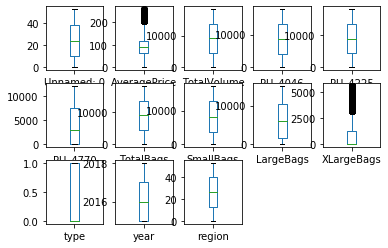

In [66]:
# Data Visualization - Unvariate plot (box and whisker plots)
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

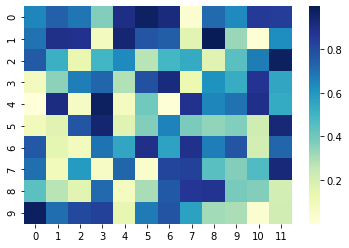

In [67]:
# Data Visualization - Multivariate Plots
import numpy as np
import seaborn as sns
df = np.random.rand(10, 12)
ax = sns.heatmap(df, cmap="YlGnBu")

# Preparing inupts (X) & Target (y) values -

In [68]:
import pandas as pd

# data=pd.get_dummies(df)

data= pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/avocado.csv", delimiter=',', header=None, skiprows=1, names=['AveragePrice','region','TotalVolume','PU_4046','PU_4225','PU_4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year'])

feature_cols = ['TotalVolume','PU_4046','PU_4225','PU_4770','TotalBags','SmallBags','LargeBags','type']
X = data[feature_cols]
X.head()

,,TotalVolume,PU_4046,PU_4225,PU_4770,TotalBags,SmallBags,LargeBags,type
0,2015-12-27,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,2015-12-20,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,2015-12-13,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,2015-12-06,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,2015-11-29,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [69]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(18249, 8)


In [70]:
# select a Series from the DataFrame
y = data['region']

# equivalent command that works if there are no spaces in the column name
y = data.region

# print the first 5 values
y.head()

0  2015-12-27     64236.62
1  2015-12-20     54876.98
2  2015-12-13    118220.22
3  2015-12-06     78992.15
4  2015-11-29     51039.60
Name: region, dtype: float64

In [71]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(18249,)


# Apply Linear Regression Algorithm-

In [72]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13686, 8)
(4563, 8)
(13686,)
(4563,)


In [73]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [74]:

# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
# Interpreting model coefficients
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)
zip(feature_cols, linreg.coef_)

-5399.323111759848
[0.99999585 0.99999779 1.00000875 0.73834406 0.26167171 0.26164797
 0.26144287 2.67913028]


In [76]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [77]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  4.679292239795528
Mean Sqr Error:    694.1844450712115
Root mean sqr error:  26.347380231651332


In [78]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Split data using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.20)

max_rscore=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.20)
    regrn = linear_model.LinearRegression()
    regrn.fit(X_train,y_train)
    y_pred = regrn.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 61  is  0.9999999999793662


# Save Linear Regression Model for best Score

In [79]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))

Test score for linear regression: 100.00 %


In [84]:
# check class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

3327.10       1
98863.64      1
1364272.64    1
216881.30     1
3888.18       1
             ..
759157.50     1
27051.50      1
2737.65       1
67245.25      1
1584.00       1
Name: region, Length: 3650, dtype: int64

Conclusion - Linear Regression Model best score is 100 for this dataset,Avacado species found in year 2015 to 2018 in all the regions,specifically in region's first letter starts with A & B